In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 81s 0us/step


In [3]:
train_images.shape # 50000 images of 32*32 size RGB color code

(50000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels.shape

(10000, 1)

In [7]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
train_labels[i][0]

2

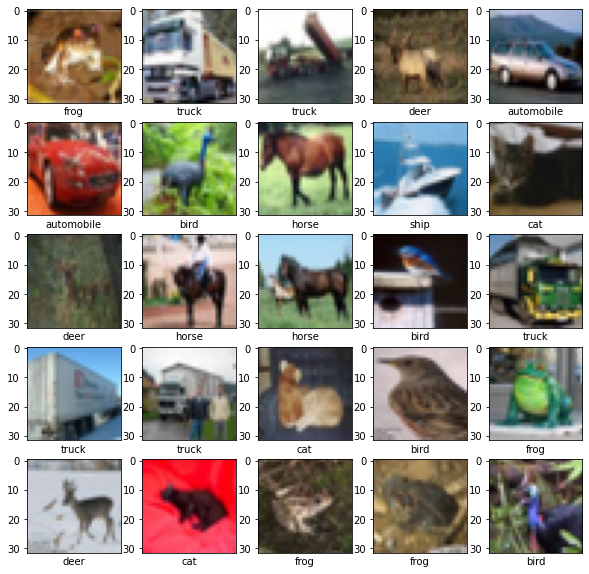

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i]) # to show images
    plt.xticks([]) # to give space for labels to display after the image
    plt.xlabel(class_names[train_labels[i][0]])

In [19]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

# Implementing the VGG 16 architecture

In [21]:
model = Sequential([
    #coding 2 convolution layers of 64 filters each of 3*3 size
    layers.Conv2D(64,(3,3),activation="relu", padding="same",input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3),activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    #coding 2 convolution layers of 128 filters each of 3*3 size
    layers.Conv2D(128,(3,3),activation="relu", padding="same"),
    layers.Conv2D(128,(3,3),activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    #coding 3 convolution layers of 256 filters each of 3*3 size
    layers.Conv2D(256,(3,3),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    #coding 3 convolution layers of 512 filters each of 3*3 size
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    #coding 3 convolution layers of 512 filters each of 3*3 size
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.Conv2D(512,(3,3),activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    #Flattening the above layers
    layers.Flatten(),
    
    #Fully connected layer
    layers.Dense(2048,activation="relu"),
    layers.Dense(2048,activation="relu"),
    layers.Dense(10,activation="softmax")
]
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
history = model.fit(train_images,train_labels,batch_size=500, epochs=5, validation_data=(test_images,test_labels))

Epoch 1/5
100/100 [==============================] - 4602s 46s/step - loss: 2.6585 - accuracy: 0.1036 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
100/100 [==============================] - 4514s 45s/step - loss: 2.2989 - accuracy: 0.1048 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/5
100/100 [==============================] - 4289s 43s/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
100/100 [==============================] - 4101s 41s/step - loss: 2.3029 - accuracy: 0.0979 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 5/5
100/100 [==============================] - 4101s 41s/step - loss: 2.3253 - accuracy: 0.0977 - val_loss: 2.3033 - val_accuracy: 0.1000


In [25]:
history.history["accuracy"]

[0.10363999754190445,
 0.1048400029540062,
 0.10012000054121017,
 0.09790000319480896,
 0.09765999764204025]

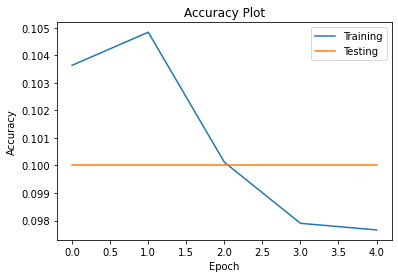

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend(["Training", "Testing"])

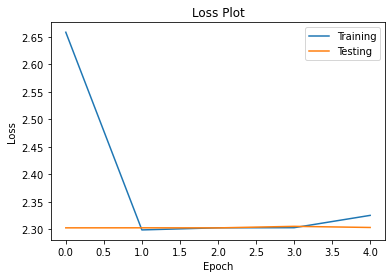

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend(["Training", "Testing"])